In [15]:
import pandas as pd

In [ ]:
#Merging Last Two Years( DataCA Source, Selected SKU AND Traffic Last two Years)
dt1 = pd.read_excel('....../AMZ Traffic Report .xlsx', sheet_name='Selected SKU')
dt2 = pd.read_excel('....../AMZ Traffic Report .xlsx', sheet_name='ATD L2 Years 05Oct21-04Oct23')

dt3 = pd.read_excel('....../AMZ Traffic Report .xlsx', sheet_name='CA Source')

In [ ]:
merge1 = pd.merge(dt1, dt2, how='inner', on='SKU')

Last_2Yrs_FBA_Merge = pd.merge(merge1,dt3, how='inner', on='SKU')

Last_2Yrs_FBA_Merge.head()

In [16]:
Last_2Yrs_FBA_Merge.to_excel('Last_2Yrs_FBA_Merge.xlsx', index=False)

In [ ]:
#Assigning the final merged data to a dataframe
df1=Last_2Yrs_FBA_Merge

In [17]:

df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4932 entries, 0 to 4931
Data columns (total 88 columns):
 #   Column                                                                                        Non-Null Count  Dtype  
---  ------                                                                                        --------------  -----  
 0   PID                                                                                           4932 non-null   int64  
 1   Att (Variation)                                                                               2163 non-null   float64
 2   SKU                                                                                           4932 non-null   object 
 3   ASIN (To Populate)                                                                            4645 non-null   object 
 4   Link to Amazon                                                                                4932 non-null   object 
 5   Amazon Title               

In [18]:
#Checking missing Null Values 
missing_values = df1.isnull().sum()

In [19]:
print('Number of missing values in each column:')
print(missing_values)



Number of missing values in each column:
PID                               0
Att (Variation)                2769
SKU                               0
ASIN (To Populate)              287
Link to Amazon                    0
                               ... 
Ordered Product Sales             0
Ordered Product Sales - B2B       0
Total Order Items                 0
Total Order Items - B2B           0
Fulfilled By                      0
Length: 88, dtype: int64


In [20]:
#for sale price replacing the missing values with 0
df1['Sale Price'] = df1['Sale Price'].fillna(0)
#Replacing nan with 0
df1['Avg Star Rating'].fillna(0, inplace=True)
#replace 'No ASIN' with 0 in the same column
df1['Avg Star Rating'] = df1['Avg Star Rating'].replace('No ASIN', 0)
#replace Link no encontrado with 0
df1['Avg Star Rating'] = df1df1['Avg Star Rating'].replace('Link no encontrado', 0)


#'Sessions - Total'
df1['Sessions - Total'].fillna(0, inplace = True)



#Featured Offer (Buy Box) Percentage
df1['Featured Offer (Buy Box) Percentage'].fillna(0, inplace = True)

#Country of Origin
df1['Country of Origin'].fillna(0, inplace = True)

#Category
df1['Category'].fillna(0, inplace = True)

#Subcategory
df1['Subcategory'].fillna(0, inplace = True)

In [21]:
df1.fillna('null', inplace=True)

In [22]:
missing_values = df1.isnull().sum()

In [23]:
print('Number of missing values in each column:')
print(missing_values)


Number of missing values in each column:
PID                            0
Att (Variation)                0
SKU                            0
ASIN (To Populate)             0
Link to Amazon                 0
                              ..
Ordered Product Sales          0
Ordered Product Sales - B2B    0
Total Order Items              0
Total Order Items - B2B        0
Fulfilled By                   0
Length: 88, dtype: int64


In [24]:
#checking the duplicate Values
duplicate_rows = df1[df1.duplicated()]


In [25]:
print('Duplicate Rows:')
print(duplicate_rows)

Duplicate Rows:
Empty DataFrame
Columns: [PID, Att (Variation), SKU, ASIN (To Populate), Link to Amazon, Amazon Title, Country of Origin, # Product Reviews, Avg Star Rating, Seasonality, Category, Subcategory, Category>Subcategory, Amazon Ranking (within Category) - not available (Project participants can fill in manually), Keywords, Sales Rating (internal - nonAmazon), Sale Price, Inv Qty End of Period (Jul 30 - Aug 5), Traffic Jul 30 - Aug 5, Conversion Rate Jul 30 - Aug 5, Order Qty Rate Jul 30 - Aug 5, Quantity Aug 19 - Aug 26, Traffic Aug 19 - Aug 26, Conversion Rate Aug 19 - Aug 26, Order Qty Rate, Quantity Sep 2 - Sep 9, Traffic Sep 2 - Sep 9, Conversion Rate Sep 2 - Sep 9, Order Qty Rate.1, Quantity Sep 9 - Sep 16, Traffic Sep 9 - Sep 16, Conversion Rate Sep 9 - Sep 16, Order Qty Rate.2, Quantity Sep 16 - Sep 23, Traffic Sep 16 - Sep 23, Conversion Rate Sep 16 - Sep 23, Order Qty Rate.3, Quantity Sep 23 - Oct 2, Traffic Sep 23 - Oct 2, Conversion Rate Sep 23 - Oct 2, Order Qty 

In [29]:
#Removing B2B sessions from total sessions

df1['Sessions_Total_Exc-B2B'] =df1['Sessions - Total']-df1['Sessions - Total - B2B']


In [30]:
# Finding Conversion Rate exluding B2B & Review Impact Score 
df1['Conversion Rate'] = (( df1['Units Ordered'] - df1['Units Ordered - B2B'] )/df1['Sessions_Total_Exc-B2B'] )*100

#Converting Product Reviews & Avg star rating to numeric and finding review impact score.
df1['# Product Reviews'] = pd.to_numeric(df1['# Product Reviews'], errors='coerce')
df1['Avg Star Rating'] = pd.to_numeric(df1['Avg Star Rating'], errors='coerce')
df1['Review_Impact_Score'] = df1['# Product Reviews'] * df1['Avg Star Rating']

In [ ]:
# Converting FBA into binary 0 & 1 , creating dummy variables
df1= pd.get_dummies(df1, columns=['Fulfilled By'], prefix='FulfilledBy')

In [31]:
df1.columns

Index(['PID', 'Att (Variation)', 'SKU', 'ASIN (To Populate)', 'Link to Amazon',
       'Amazon Title', 'Country of Origin', '# Product Reviews',
       'Avg Star Rating', 'Seasonality', 'Category', 'Subcategory',
       'Category>Subcategory',
       'Amazon Ranking (within Category) - not available (Project participants can fill in manually)',
       'Keywords', 'Sales Rating (internal - nonAmazon)', 'Sale Price',
       'Inv Qty End of Period (Jul 30 - Aug 5)', 'Traffic Jul 30 - Aug 5',
       'Conversion Rate Jul 30 - Aug 5', 'Order Qty Rate Jul 30 - Aug 5',
       'Quantity Aug 19 - Aug 26', 'Traffic Aug 19 - Aug 26',
       'Conversion Rate Aug 19 - Aug 26', 'Order Qty Rate',
       'Quantity Sep 2 - Sep 9', 'Traffic Sep 2 - Sep 9',
       'Conversion Rate Sep 2 - Sep 9', 'Order Qty Rate.1',
       'Quantity Sep 9 - Sep 16', 'Traffic Sep 9 - Sep 16',
       'Conversion Rate Sep 9 - Sep 16', 'Order Qty Rate.2',
       'Quantity Sep 16 - Sep 23', 'Traffic Sep 16 - Sep 23',
       'C

In [34]:
#Removing Dollar Sign from Sales price
df1['Sale Price'] = df1['Sale Price'].replace('[\$,]', '', regex=True).astype(str)


In [35]:
#Converting string into numeric
df1['Sale Price'] = pd.to_numeric(df1['Sale Price'], errors='coerce')

In [40]:
#Converting Seasonality into binary values
df1['Seasonality'] = df1['Seasonality'].replace('null', 0)


In [41]:
df1['Seasonality'] = df1['Seasonality'].replace('Not Seasonal', 0)


In [42]:
df1['Seasonality'] = df1['Seasonality'].apply(lambda x: 1 if x != 0 else 0)

In [43]:
df1['Seasonality']

0       0
1       0
2       0
3       1
4       0
       ..
4927    1
4928    0
4929    0
4930    1
4931    0
Name: Seasonality, Length: 4932, dtype: int64

In [ ]:
''' TRAFFIC ANALYSIS'''

'''Sessions = 0'''
session_0 = df1[df1['Sessions_Total_Exc-B2B'] == 0]
avg_buy_box_percentage_0 = session_0['Featured Offer (Buy Box) Percentage'].mean()
print(avg_buy_box_percentage_0)

In [ ]:
'''Sessions 1 to 15'''
sessions_1_to_15 = df1[(df1['Sessions_Total_Exc-B2B'] >= 1) & (traffic_data['Sessions_Total_Exc-B2B'] <= 15)]
top_categories = sessions_1_to_15['Category'].value_counts().nlargest(5)
print(top_categories) #Clothing, Jewelry, Tableware, Sculpture, Accessories


#Regression Analysis
import statsmodels.api as sm
# List of top categories
top_categories_list = ['Clothing', 'Jewelry', 'Tableware', 'Sculpture', 'Accessories']

# Perform regression analysis for each category
for category in top_categories_list:
    # Filter data for the current category
    category_data = sessions_1_to_15[sessions_1_to_15['Category'] == category]
    
    # Define independent and dependent variables
    independent_vars = ['Sale Price', 'FulfilledBy_Fulfilled by Amazon', 'Review Impact Score', 'Seasonality']
    X = category_data[independent_vars]
    y = category_data['Sessions_Total_Exc-B2B']

    # Add a constant to the independent variables
    X = sm.add_constant(X)

    # Fit the regression model
    model = sm.OLS(y, X).fit()

    # Print the summary
    print(f"\nRegression Analysis Summary for {category}:\n")
    print(model.summary())
    

# DataFrame: Average Buy Box and Percentage FBA for each category
top_categories_list = ['Clothing', 'Jewelry', 'Tableware', 'Sculpture', 'Accessories']
result_df = pd.DataFrame(columns=['Category', 'Percentage Fulfilled by Amazon', 'Avg Buy Box Percentage'])

# Iterate over each category
for category in top_categories_list:
    # Filter data for the current category
    category_data = sessions_1_to_15[sessions_1_to_15['Category'] == category]

    # Percentage fulfilled by Amazon
    percentage_fulfilled_by_amazon = (category_data['FulfilledBy_Fulfilled by Amazon'].sum() / len(category_data)) * 100

    # Average 'Buy Box Percentage'
    avg_buy_box_percentage = category_data['Featured Offer (Buy Box) Percentage'].mean()

    # Append the results to the result DataFrame
    result_df = result_df.append({'Category': category, 'Percentage Fulfilled by Amazon': percentage_fulfilled_by_amazon, 'Avg Buy Box Percentage': avg_buy_box_percentage}, ignore_index=True)
print(result_df)

C:\Users\AbhiStyles\AppData\Local\Temp\ipykernel_30972\2930272526.py:11: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pie_data = top_categories.append(pd.Series(other_sessions, index=['Others']))


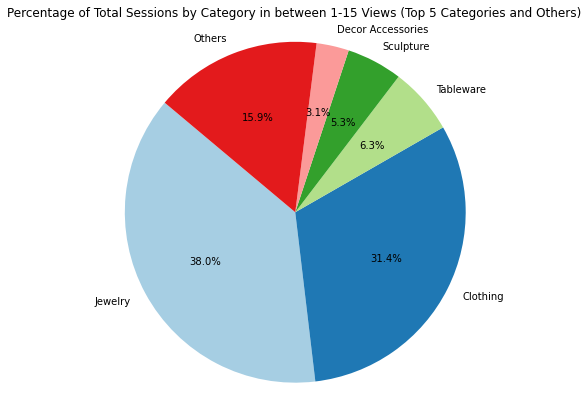

In [51]:
#Ploting total session for top 5 categories and remaining
import matplotlib.pyplot as plt
category_sessions = sessions_1_to_15.groupby('Category')['Sessions_Total_Exc-B2B'].sum()

# Sort and select top 5 categories
top_categories = category_sessions.sort_values(ascending=False).head(5)

# Sum of sessions for other categories
other_sessions = category_sessions.sort_values(ascending=False)[5:].sum()

# Creating a new Series for the pie chart
pie_data = top_categories.append(pd.Series(other_sessions, index=['Others']))

# Creating the pie chart
plt.figure(figsize=(10, 7))
plt.pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(pie_data))))
plt.title('Percentage of Total Sessions by Category in between 1-15 Views (Top 5 Categories and Others)')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

# Show the plot
plt.show()

In [ ]:

'''Sessions 16 to 30'''
sessions_16_to_30 = df1[(df1['Sessions - Total'] >= 16) & (df1['Sessions_Total_Exc-B2B'] <= 30)]
top_categories = sessions_16_to_30['Category'].value_counts().nlargest(5)
print(top_categories)

top_categories_list = ['Jewelry', 'Clothing', 'Tableware', 'Sculpture', 'Accessories']

# Perform regression analysis for each category
for category in top_categories_list:
    # Filter data for the current category
    category_data = sessions_16_to_30[sessions_16_to_30['Category'] == category]

    # Define independent and dependent variables
    independent_vars = ['Featured Offer (Buy Box) Percentage', 'FulfilledBy_Fulfilled by Amazon', 'Review Impact Score', 'Seasonality']
    X = category_data[independent_vars]
    y = category_data['Sessions_Total_Exc-B2B']

    # Add a constant to the independent variables
    X = sm.add_constant(X)

    # Fit the regression model
    model = sm.OLS(y, X).fit()

    # Print the summary
    print(f"\nRegression Analysis Summary for {category}:\n")
    print(model.summary())


# DataFrame: Average Buy Box and Percentage FBA for each category
top_categories_list = ['Jewelry', 'Clothing', 'Tableware', 'Sculpture', 'Accessories']
result_df1 = pd.DataFrame(columns=['Category', 'Percentage Fulfilled by Amazon', 'Avg Buy Box Percentage'])

# Iterate over each category
for category in top_categories_list:
    # Filter data for the current category
    category_data = sessions_1_to_15[sessions_1_to_15['Category'] == category]

    # Percentage fulfilled by Amazon
    percentage_fulfilled_by_amazon = (category_data['Fulfilled By_Fulfilled by Amazon'].sum() / len(category_data)) * 100

    # Average 'Buy Box Percentage'
    avg_buy_box_percentage = category_data['Featured Offer (Buy Box) Percentage'].mean()

    # Append the results to the result DataFrame
    result_df1 = result_df1.append({'Category': category, 'Percentage Fulfilled by Amazon': percentage_fulfilled_by_amazon, 'Avg Buy Box Percentage': avg_buy_box_percentage}, ignore_index=True)

# Display the result DataFrame
print(result_df1)


C:\Users\AbhiStyles\AppData\Local\Temp\ipykernel_30972\4058960017.py:11: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pie_data2 = top_categories2.append(pd.Series(other_sessions2, index=['Others']))


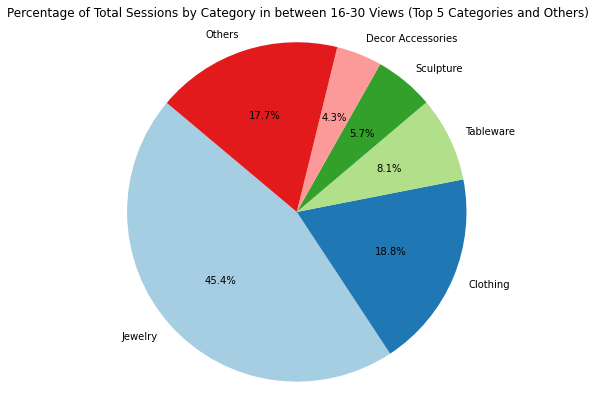

In [54]:
#Assigning the data with sessions between 16-30 to a new data frame
import matplotlib.pyplot as plt
category_sessions2 = sessions_16_to_30.groupby('Category')['Sessions_Total_Exc-B2B'].sum()

# Sort and select top 5 categories
top_categories2 = category_sessions2.sort_values(ascending=False).head(5)

# Sum of sessions for other categories
other_sessions2 = category_sessions2.sort_values(ascending=False)[5:].sum()

# Creating a new Series for the pie chart
pie_data2 = top_categories2.append(pd.Series(other_sessions2, index=['Others']))

# Creating the pie chart
plt.figure(figsize=(10, 7))
plt.pie(pie_data2, labels=pie_data.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(pie_data2))))
plt.title('Percentage of Total Sessions by Category in between 16-30 Views (Top 5 Categories and Others)')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

# Show the plot
plt.show()

In [55]:
#Traffic with Greater than 30 sessions.
df_Updated_traf_grt_30=df1[df1['Sessions_Total_Exc-B2B'] > 30]

In [59]:
#Calculating Price per Sessions
df_Updated_traf_grt_30['Price_Per_Session'] = (df_Updated_traf_grt_30['Sale Price'] * (df_Updated_traf_grt_30['Units Ordered']-df_Updated_traf_grt_30['Units Ordered - B2B'])) / df_Updated_traf_grt_30['Sessions_Total_Exc-B2B']


C:\Users\AbhiStyles\AppData\Local\Temp\ipykernel_30972\295953719.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Traf_Grt_30['Price_Per_Session'] = (df_Traf_Grt_30['Sale Price'] * (df_Traf_Grt_30['Units Ordered']-df_Traf_Grt_30['Units Ordered - B2B'])) / df_Traf_Grt_30['Sessions_Total_Exc-B2B']


In [61]:
#Calculating Mean for price per Sessions
mean_price_per_session = df_Updated_traf_grt_30['Price_Per_Session'].mean()

In [62]:
mean_price_per_session

1.639283316315874

In [88]:
"""Divind the whole data set with greater than 30 Sessions into 4 segments
1)High price per session & Low Conversion Rate
2)Low price per session & low Conversion Rate
3)High price per session & High Conversion Rate
4)Low price per session & High Conversion Rate"""

df_Hpp_Lcr = df_Updated_traf_grt_30[(df_Updated_traf_grt_30['Price_Per_Session'] >= 1.63) & (df_Updated_traf_grt_30['Conversion Rate'] < 1)]


In [89]:
df_Hpp_Lcr

,PID,Att (Variation),SKU,ASIN (To Populate),Link to Amazon,Amazon Title,Country of Origin,# Product Reviews,Avg Star Rating,Seasonality,...,Total Order Items - B2B,Page_Views_excl_B2B,Sessions_Total_Exc-B2B,Conversion Rate,Price_Category,Traffic_Level,Review_Impact_Score,Price_Per_Session,FulfilledBy_Fulfilled by Amazon,FulfilledBy_Fulfilled by Merchant
575,366447,null,366447,B081TLN963,https://www.amazon.com/dp/B081TLN963,Novica Artistic Splash Art Glass Decorative Bowl,Brazil,1.0,5.0,0,...,1,3134,2259,0.752545,High(150-300),High,5.0,1.806034,0,1
676,363095,null,363095,B081TKNVBY,https://www.amazon.com/dp/B081TKNVBY,Novica Bending Time Art Glass Centerpiece,Brazil,0.0,0.0,0,...,0,364,270,0.370370,Very_High(300-500),Medium,0.0,1.807370,0,1
1049,193906,null,193906,B00822MGPK,https://www.amazon.com/dp/B00822MGPK,NOVICA Artisan Handmade Mohena Wood and Leathe...,Andes,55.0,4.5,0,...,1,6887,5355,0.933707,High(150-300),High,247.5,1.764613,1,0
2045,115512,null,115512,B000ET7P00,https://www.amazon.com/dp/B000ET7P00,NOVICA Handmade .925 Sterling Silver Cuff Brac...,Thailand,3.0,5.0,0,...,0,970,735,0.816327,High(150-300),High,15.0,2.024408,0,1
2394,291069,null,291069,B00C7WUZ22,https://www.amazon.com/dp/B00C7WUZ22,NOVICA Handmade .925 Sterling Silver Multigems...,India,0.0,0.0,0,...,0,463,348,0.862069,High(150-300),Medium,0.0,1.637845,0,1
2780,44293,null,44293,B00014Z6FO,https://www.amazon.com/dp/B00014Z6FO,NOVICA Artisan Handmade Celadon Ceramic Vase G...,Thailand,5.0,5.0,0,...,2,1793,1374,0.800582,High(150-300),High,25.0,2.161492,0,1
3217,81789,null,81789,B00014ZHOO,https://www.amazon.com/dp/B00014ZHOO,NOVICA Artisan Handmade Men's .925 Sterling Si...,Bali and Java,2.0,5.0,0,...,0,1112,839,0.953516,High(150-300),High,10.0,1.974636,0,1
4921,302204,null,302204,B07B1QHRGV,https://www.amazon.com/dp/B07B1QHRGV,NOVICA Artisan Handmade Wood Wall Mirror Sun a...,Andes,13.0,4.0,0,...,1,6488,4564,0.985977,High(150-300),High,52.0,2.129612,1,0


In [90]:
df_Hpp_Hcr = df_Updated_traf_grt_30[(df_Updated_traf_grt_30['Price_Per_Session'] >= 1.63) & (df_Updated_traf_grt_30['Conversion Rate'] >=1)]


In [92]:
df_Lpp_Hcr = df_Updated_traf_grt_30[(df_Updated_traf_grt_30['Price_Per_Session'] < 1.63) & (df_Updated_traf_grt_30['Conversion Rate'] >=1)]


In [96]:
df_Lpp_Lcr = df_Updated_traf_grt_30[(df_Updated_traf_grt_30['Price_Per_Session'] < 1.63) & (df_Updated_traf_grt_30['Conversion Rate'] <1)]


In [228]:
#Regression Analysis for High price per session and low conversion rate
    X = sm.add_constant(df_Hpp_Lcr[['Featured Offer (Buy Box) Percentage', 'FulfilledBy_Fulfilled by Amazon', 'FulfilledBy_Fulfilled by Merchant', 'Review_Impact_Score', 'Seasonality']])
    y = df_Hpp_Lcr['Conversion Rate']
    model = sm.OLS(y,X).fit()
   
    print("df_Hpp_Lcr")
    print(model.summary())
    print("\n" * 2)

df_Hpp_Lcr
                            OLS Regression Results                            
Dep. Variable:        Conversion Rate   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                 -0.342
Method:                 Least Squares   F-statistic:                    0.4056
Date:                Wed, 06 Dec 2023   Prob (F-statistic):              0.758
Time:                        17:13:57   Log-Likelihood:                 3.3215
No. Observations:                   8   AIC:                             1.357
Df Residuals:                       4   BIC:                             1.675
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

C:\Users\AbhiStyles\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\AbhiStyles\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1918: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [227]:
#Regression Analysis for Low price per session and High conversion rate for top 5 categories
df_sorted = df_Lpp_Hcr.groupby('Category')['Sessions_Total_Exc-B2B'].sum()
top_categories = df_sorted.sort_values(ascending=False).head(5)
new_dataframes = {}
for category in top_categories.index:
    new_dataframes[category] = df_Lpp_Hcr[df_Lpp_Hcr['Category'] == category].copy()
    X = sm.add_constant(new_dataframes[category][['Featured Offer (Buy Box) Percentage', 'FulfilledBy_Fulfilled by Amazon', 'FulfilledBy_Fulfilled by Merchant', 'Review_Impact_Score', 'Seasonality']])
    y = new_dataframes[category]['Conversion Rate']
    model = sm.OLS(y,X).fit()
   
    print(f"{category}_Lpp_Hcr")
    print(model.summary())
    print("\n" * 2)

Jewelry_Lpp_Hcr
                            OLS Regression Results                            
Dep. Variable:        Conversion Rate   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     11.41
Date:                Wed, 06 Dec 2023   Prob (F-statistic):           6.45e-09
Time:                        17:09:44   Log-Likelihood:                -936.41
No. Observations:                 574   AIC:                             1883.
Df Residuals:                     569   BIC:                             1905.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

C:\Users\AbhiStyles\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1918: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
C:\Users\AbhiStyles\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1918: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
C:\Users\AbhiStyles\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\AbhiStyles\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1918: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [ ]:
#Regression Analysis for High price per session and High conversion rate for top 5 categories
df_sorted = df_Hpp_Hcr.groupby('Category')['Sessions_Total_Exc-B2B'].sum()
top_categories = df_sorted.sort_values(ascending=False).head(5)
new_dataframes = {}
for category in top_categories.index:
    new_dataframes[category] = df_Hpp_Hcr[df_Hpp_Hcr['Category'] == category].copy()
    X = sm.add_constant(new_dataframes[category][['Featured Offer (Buy Box) Percentage', 'FulfilledBy_Fulfilled by Amazon', 'FulfilledBy_Fulfilled by Merchant', 'Review_Impact_Score', 'Seasonality']])
    y = new_dataframes[category]['Conversion Rate']
    model = sm.OLS(y,X).fit()
   
    print(f"{category}_Lpp_Hcr")
    print(model.summary())
    print("\n" * 2)

In [ ]:
#Regression Analysis for Low price per session and Low conversion rate for top 5 categories
df_sorted = df_Lpp_Lcr.groupby('Category')['Sessions_Total_Exc-B2B'].sum()
top_categories = df_sorted.sort_values(ascending=False).head(5)
new_dataframes = {}
for category in top_categories.index:
    new_dataframes[category] = df_Lpp_Lcr[df_Lpp_Lcr['Category'] == category].copy()
    X = sm.add_constant(new_dataframes[category][['Featured Offer (Buy Box) Percentage', 'FulfilledBy_Fulfilled by Amazon', 'FulfilledBy_Fulfilled by Merchant', 'Review_Impact_Score', 'Seasonality']])
    y = new_dataframes[category]['Conversion Rate']
    model = sm.OLS(y,X).fit()
   
    print(f"{category}_Lpp_Hcr")
    print(model.summary())
    print("\n" * 2)

In [266]:
"""Stats Data
Finding Average /Mean of every dependent variable for each segment for top5 categories"""


#For High price per session and High conversion rate
# Group by 'Category' and sum the 'Sessions - Total' for each category
category_session_views = df_Hpp_Hcr.groupby('Category')['Sessions_Total_Exc-B2B'].sum()

# Get the top 5 categories based on session views
top_categories = category_session_views.nlargest(5).index

# Loop through top categories
for category in top_categories:
    filtered_category = df_Hpp_Hcr[df_Hpp_Hcr['Category'] == category]
    
    # Calculate the average of each column in the filtered DataFrame
    avg_buybox_percentage = filtered_category['Featured Offer (Buy Box) Percentage'].mean()
    avg_price_per_session = filtered_category['Price_Per_Session'].mean()
    avg_conversion_rate = filtered_category['Conversion Rate'].mean()

    # Calculate the percentage of SKUs Fulfilled by Amazon
    total_skus = filtered_category['SKU'].count()
    fulfilled_by_amazon_skus = filtered_category[filtered_category['FulfilledBy_Fulfilled by Amazon'] == 1]['SKU'].count()
    percentage_fulfilled_by_amazon = (fulfilled_by_amazon_skus / total_skus) * 100
    
    # Print or use the results as needed
    print(f"Category: {category}")
    print(f"Avg Buybox Percentage: {avg_buybox_percentage}")
    print(f"Avg Price per Session: {avg_price_per_session}")
    print(f"Avg Conversion Rate: {avg_conversion_rate}")
    print(f"Percentage Fulfilled by Amazon: {percentage_fulfilled_by_amazon}")
    print("-" * 50)


Category: Jewelry
Avg Buybox Percentage: 0.9867971882640595
Avg Price per Session: 2.6306005790229223
Avg Conversion Rate: 4.791891182004369
Percentage Fulfilled by Amazon: 60.024449877750605
--------------------------------------------------
Category: Tableware
Avg Buybox Percentage: 0.9276315068493151
Avg Price per Session: 2.786180199133188
Avg Conversion Rate: 4.283983090087115
Percentage Fulfilled by Amazon: 53.42465753424658
--------------------------------------------------
Category: Masks
Avg Buybox Percentage: 0.9665470588235294
Avg Price per Session: 2.214764646761849
Avg Conversion Rate: 2.9050477366478984
Percentage Fulfilled by Amazon: 64.70588235294117
--------------------------------------------------
Category: Clothing
Avg Buybox Percentage: 0.986777108433735
Avg Price per Session: 3.9089625740952254
Avg Conversion Rate: 3.319493574891725
Percentage Fulfilled by Amazon: 20.481927710843372
--------------------------------------------------
Category: Sculpture
Avg Buybox 

In [ ]:

#For High price per session and Low conversion rate
# Group by 'Category' and sum the 'Sessions - Total' for each category
category_session_views = df_Hpp_Lcr.groupby('Category')['Sessions_Total_Exc-B2B'].sum()

# Get the top 5 categories based on session views
top_categories = category_session_views.nlargest(5).index

# Loop through top categories
for category in top_categories:
    filtered_category = df_Hpp_Lcr[df_Hpp_Lcr['Category'] == category]
    
    # Calculate the average of each column in the filtered DataFrame
    avg_buybox_percentage = filtered_category['Featured Offer (Buy Box) Percentage'].mean()
    avg_price_per_session = filtered_category['Price_Per_Session'].mean()
    avg_conversion_rate = filtered_category['Conversion Rate'].mean()

    # Calculate the percentage of SKUs Fulfilled by Amazon
    total_skus = filtered_category['SKU'].count()
    fulfilled_by_amazon_skus = filtered_category[filtered_category['FulfilledBy_Fulfilled by Amazon'] == 1]['SKU'].count()
    percentage_fulfilled_by_amazon = (fulfilled_by_amazon_skus / total_skus) * 100
    
    # Print or use the results as needed
    print(f"Category: {category}")
    print(f"Avg Buybox Percentage: {avg_buybox_percentage}")
    print(f"Avg Price per Session: {avg_price_per_session}")
    print(f"Avg Conversion Rate: {avg_conversion_rate}")
    print(f"Percentage Fulfilled by Amazon: {percentage_fulfilled_by_amazon}")
    print("-" * 50)


In [ ]:

#For Low price per session and High conversion rate
# Group by 'Category' and sum the 'Sessions - Total' for each category
category_session_views = df_Lpp_Hcr.groupby('Category')['Sessions_Total_Exc-B2B'].sum()

# Get the top 5 categories based on session views
top_categories = category_session_views.nlargest(5).index

# Loop through top categories
for category in top_categories:
    filtered_category = df_Lpp_Hcr[df_Lpp_Hcr['Category'] == category]
    
    # Calculate the average of each column in the filtered DataFrame
    avg_buybox_percentage = filtered_category['Featured Offer (Buy Box) Percentage'].mean()
    avg_price_per_session = filtered_category['Price_Per_Session'].mean()
    avg_conversion_rate = filtered_category['Conversion Rate'].mean()

    # Calculate the percentage of SKUs Fulfilled by Amazon
    total_skus = filtered_category['SKU'].count()
    fulfilled_by_amazon_skus = filtered_category[filtered_category['FulfilledBy_Fulfilled by Amazon'] == 1]['SKU'].count()
    percentage_fulfilled_by_amazon = (fulfilled_by_amazon_skus / total_skus) * 100
    
    # Print or use the results as needed
    print(f"Category: {category}")
    print(f"Avg Buybox Percentage: {avg_buybox_percentage}")
    print(f"Avg Price per Session: {avg_price_per_session}")
    print(f"Avg Conversion Rate: {avg_conversion_rate}")
    print(f"Percentage Fulfilled by Amazon: {percentage_fulfilled_by_amazon}")
    print("-" * 50)


In [ ]:

#For Low price per session and Low conversion rate
# Group by 'Category' and sum the 'Sessions - Total' for each category
category_session_views = df_Lpp_Lcr.groupby('Category')['Sessions_Total_Exc-B2B'].sum()

# Get the top 5 categories based on session views
top_categories = category_session_views.nlargest(5).index

# Loop through top categories
for category in top_categories:
    filtered_category = df_Lpp_Lcr[df_Lpp_Lcr['Category'] == category]
    
    # Calculate the average of each column in the filtered DataFrame
    avg_buybox_percentage = filtered_category['Featured Offer (Buy Box) Percentage'].mean()
    avg_price_per_session = filtered_category['Price_Per_Session'].mean()
    avg_conversion_rate = filtered_category['Conversion Rate'].mean()

    # Calculate the percentage of SKUs Fulfilled by Amazon
    total_skus = filtered_category['SKU'].count()
    fulfilled_by_amazon_skus = filtered_category[filtered_category['FulfilledBy_Fulfilled by Amazon'] == 1]['SKU'].count()
    percentage_fulfilled_by_amazon = (fulfilled_by_amazon_skus / total_skus) * 100
    
    # Print or use the results as needed
    print(f"Category: {category}")
    print(f"Avg Buybox Percentage: {avg_buybox_percentage}")
    print(f"Avg Price per Session: {avg_price_per_session}")
    print(f"Avg Conversion Rate: {avg_conversion_rate}")
    print(f"Percentage Fulfilled by Amazon: {percentage_fulfilled_by_amazon}")
    print("-" * 50)
